In [5]:
import pandas as pd
import numpy as np

#load the data
data = pd.read_excel('Tentative_data_new.xlsx')

#clean the data
def clean_score(score):
  if pd.isnull(score):
    return None
  if isinstance(score, str) and ',' in score:
    return score.split(',')
  return pd.to_numeric(score, errors='coerce')

for column in data.columns[3:]:
  data[column] = data[column].apply(clean_score)

# Split the data based on AI usage (this is the step needed)
tasks_without_ai = data[data['With AI'] == 'No'].iloc[:, 3:12]
tasks_with_ai = data[data['With AI'] == 'Yes'].iloc[:, 3:12]

# Separate values in tasks_with_ai DataFrame
tasks_with_ai[['Task Time', 'Num Prompts']] = tasks_with_ai[tasks_with_ai.columns[3:12]].apply(pd.Series.explode)

False
Empty DataFrame
Columns: [Exam Set, With AI, Participant, Task 1, Task 2, Task 3, Task 4, Task 5, Task 6, Task 7, Task 8, Task 9]
Index: []


/tmp/ipykernel_2580/129498206.py:26: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  tasks_with_ai[['Task Time', 'Num Prompts']] = tasks_with_ai[tasks_with_ai.columns[3:12]].apply(pd.Series.explode)


ValueError: cannot reindex on an axis with duplicate labels

In [10]:
#load the data
data = pd.read_excel('Tentative_data_new.xlsx')

display(data)

FileNotFoundError: [Errno 2] No such file or directory: 'Tentative_data_new.xlsx'

In [ ]:
#split the dataset based on AI usage
tasks_without_ai = data[data['With AI'] == 'No'].iloc[:, 3:12]
tasks_with_ai = data[data['With AI'] == 'Yes'].iloc[:, 3:12]

#statistical analysis
stats_without_ai = tasks_without_ai.describe().transpose()
stats_with_ai = tasks_with_ai.describe().transpose()

print(stats_without_ai, '\n', stats_with_ai)


        count  unique    top  freq
Task 1   15.0    15.0  122.0   1.0
Task 2   15.0    14.0   96.0   2.0
Task 3   15.0    15.0   76.0   1.0
Task 4   15.0    15.0  131.0   1.0
Task 5   15.0    15.0  235.0   1.0
Task 6   15.0    15.0   42.0   1.0
Task 7   14.0    14.0  224.0   1.0
Task 8   10.0    10.0  421.0   1.0
Task 9    9.0     9.0    4.0   1.0 
        count unique     top freq
Task 1    15     15  107, 1    1
Task 2    15     15   91, 1    1
Task 3    15     15   69, 1    1
Task 4    15     14  114, 1    2
Task 5    15     14  111, 1    2
Task 6    15     15   58, 1    1
Task 7    14     14   96, 1    1
Task 8     4      4  315, 1    1
Task 9     4      4     169    1


In [ ]:
#histogram for task times without AI
tasks_without_ai.plot(kind='hist', bins=15, alpha=0.5, title='Histogram of Task Times Without AI')
plt.xlabel('Time (seconds)')
plt.show()

#histogram for task times with AI
tasks_with_ai.plot(kind='hist', bins=15, alpha=0.5, title='Histogram of Task Times With AI')
plt.xlabel('Time (seconds)')
plt.show()


TypeError: no numeric data to plot

In [ ]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(tasks_without_ai['Task 1'].dropna(), tasks_with_ai['Task 1'].dropna())
print(f'T-Statistic: {t_stat}, P-value: {p_value}')


T-Statistic: 2.972598738706104, P-value: 0.010084416818026054


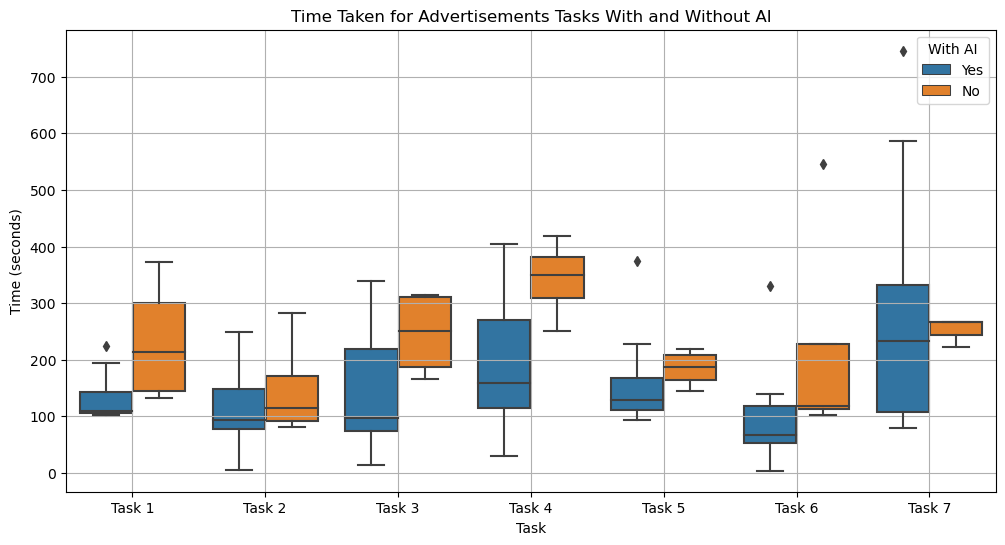

In [ ]:
#generate boxplot for the advertisements set

import seaborn as sns
import matplotlib.pyplot as plt

#filter the data for the advertisements set
ads_data = data[data['Exam Set'] == 'Advertisements']

#long-format df
melted_ads_data = pd.melt(ads_data, id_vars=['With AI'], value_vars=[f'Task {i}' for i in range(1, 8)],
                           var_name='Task', value_name='Time')

#plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Task', y='Time', hue='With AI', data=melted_ads_data)
plt.title('Time Taken for Advertisements Tasks With and Without AI')
plt.ylabel('Time (seconds)')
plt.xlabel('Task')
plt.legend(title='With AI')
plt.grid(True)
plt.show()


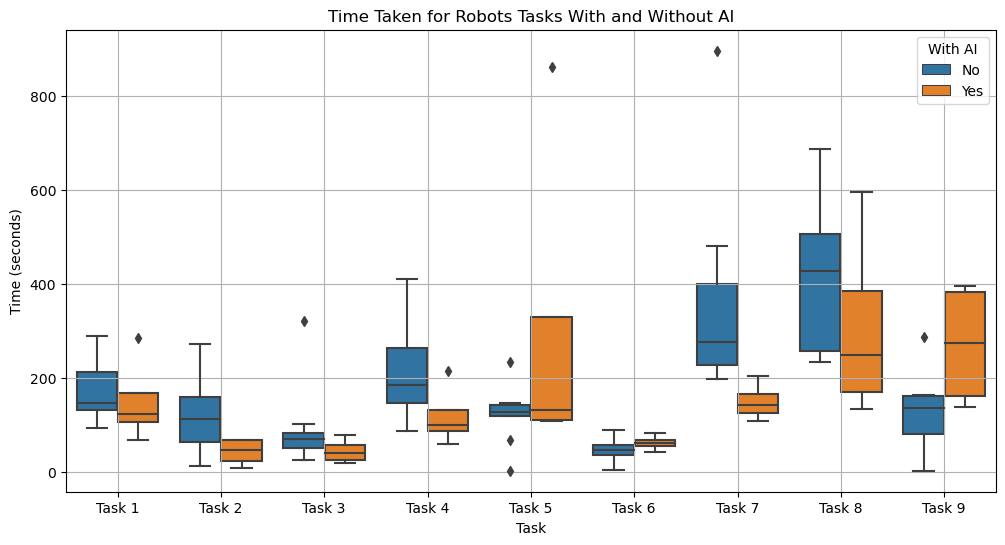

In [ ]:
#boxplot
#filter the data for the robts set
robots_data = data[data['Exam Set'] == 'Robots']

#long-format df
melted_robots_data = pd.melt(robots_data, id_vars=['With AI'], value_vars=[f'Task {i}' for i in range(1, 10)],
                              var_name='Task', value_name='Time')

#plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Task', y='Time', hue='With AI', data=melted_robots_data)
plt.title('Time Taken for Robots Tasks With and Without AI')
plt.ylabel('Time (seconds)')
plt.xlabel('Task')
plt.legend(title='With AI')
plt.grid(True)
plt.show()